In [132]:
import json
import numpy as np
import pandas as pd
import argparse
import os

In [133]:
parser = argparse.ArgumentParser(description = "Collate all results")

a = parser.add_argument('--results_dir', type=str, help="results dir",required = False)

In [134]:
argument = parser.parse_args([])

In [135]:
argument.results_dir = '../results/test_xy'

In [136]:
datasets = os.listdir(argument.results_dir)

In [137]:
test_acc  = []
dataframes = {}
for dataset in datasets:
    model_arcs = os.listdir(os.path.join(argument.results_dir,dataset))
    for model_arc in model_arcs:
        models = os.listdir(os.path.join(argument.results_dir, dataset, model_arc))
        for model in models:
            print(dataset, model_arc, model)
            folds = os.listdir(os.path.join(argument.results_dir,dataset, model_arc, model))
            for fold in ['0']:
                log_file = os.path.join(argument.results_dir,dataset, model_arc, model,fold,'logs','log.json')
                if os.path.exists(log_file):
                    with open(log_file,'r') as fh:
                        dat = fh.read()
                    dat = pd.read_json(log_file,orient = 'records',lines=True)
                    dat['fold'] = fold
                    dat['model'] = model
                    dat['model_arc'] = model_arc
                    dat['dataset'] = dataset
                    #print(dat[dat['epoch'] == -1]['best_epoch'])
                    
                    dataframes[(dataset, model_arc, model)] = dat
                    

MSRCv2_flip 3layer weighted_loss_xy_NORM_Adam_0.0001_0.0001
MSRCv2_flip 3layer cc_loss
MSRCv2_flip 3layer weighted_loss_xy_NORM_Adam_0.1_1e-06
MSRCv2_flip 3layer weighted_loss_xy_NORM_Adam_0.01_0.0001
MSRCv2_flip 3layer weighted_loss_xy_NORM_SGD_0.1_1e-05
MSRCv2_flip 3layer weighted_loss_xy_NORM_SGD_0.01_1e-05
MSRCv2_flip 3layer weighted_loss_xy_NORM_Adam_0.0001_1e-06
MSRCv2_flip 3layer weighted_loss_xy_TEST_SGD_0.001_1e-05
MSRCv2_flip 3layer weighted_loss_xy_NORM_Adam_0.01_1e-06
MSRCv2_flip 3layer weighted_loss_xy_TEST_Adam_0.01_1e-05
MSRCv2_flip 3layer weighted_loss_xy_TEST_SGD_0.01_1e-05
MSRCv2_flip 3layer weighted_loss_xy_NORM_SGD_0.001_1e-06
MSRCv2_flip 3layer weighted_loss_xy_TEST_SGD_0.1_0.0001
MSRCv2_flip 3layer weighted_loss_xy_NORM_SGD_0.1_0.0001
MSRCv2_flip 3layer weighted_loss_xy_TEST_Adam_0.0001_1e-06
MSRCv2_flip 3layer weighted_loss_xy_TEST_SGD_0.0001_0.0001
MSRCv2_flip 3layer weighted_loss_xy_NORM_Adam_0.001_1e-06
MSRCv2_flip 3layer weighted_loss_xy_TEST_Adam_0.001_1e-06

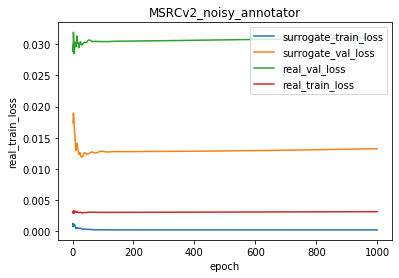

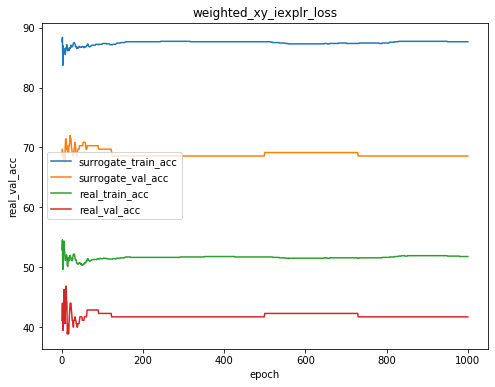

In [142]:
technique = 'weighted_loss_xy_NORM_Adam_0.001_1e-06'
technique = 'weighted_loss_xy_NORM_Adam_0.0001_0.0001'
for dataset in ['MSRCv2_noisy_annotator']:
    attribute = 'surrogate_train_loss'
    dat = dataframes[(dataset, '3layer', technique)]
    #print(dat.columns)
    ax = dat[(dat['epoch'] >-1)].plot(x='epoch', y=attribute,label = attribute )
    
    attribute = 'surrogate_val_loss'
    dat = dataframes[(dataset, '3layer', technique)]
    ax = dat[(dat['epoch'] >-1)].plot(x='epoch', y=attribute,label = attribute,ax=ax )
    #dat = dataframes[(dataset,'1layer','linear_rl_P100_Q')]
    #dat[(dat['epoch'] != -1)].plot(x='epoch', y=attribute,ax=ax, label = 'linear_rl_P100_Q')
    
    attribute = 'real_val_loss'
    dat = dataframes[(dataset, '3layer', technique)]
    ax = dat[(dat['epoch'] >-1)].plot(x='epoch', y=attribute,label = attribute,ax=ax )
    
    attribute = 'real_train_loss'
    dat = dataframes[(dataset, '3layer', technique)]
    ax = dat[(dat['epoch'] >-1)].plot(x='epoch', y=attribute,label = attribute,ax=ax )
    
    ax.set_xlabel('epoch')
    ax.set_ylabel(attribute)
    ax.set_title(dataset)
    fig = ax.get_figure()
    fig.show()
    #fig.savefig('graphs/'+dataset+'.jpg')
    
for dataset in ['MSRCv2_noisy_annotator']:
    attribute = 'surrogate_train_acc'
    dat = dataframes[(dataset, '3layer', technique)]
    #print(dat.columns)
    ax = dat[(dat['epoch'] != -1)].plot(x='epoch', y=attribute,label = attribute )
    
    attribute = 'surrogate_val_acc'
    dat = dataframes[(dataset, '3layer', technique)]
    ax = dat[(dat['epoch'] != -1)].plot(x='epoch', y=attribute,label = attribute,ax=ax )
    
    attribute = 'real_train_acc'
    dat = dataframes[(dataset, '3layer', technique)]
    ax = dat[(dat['epoch'] != -1)].plot(x='epoch', y=attribute,label = attribute,ax=ax )
    
    attribute = 'real_val_acc'
    dat = dataframes[(dataset, '3layer', technique)]
    ax = dat[(dat['epoch'] != -1)].plot(x='epoch', y=attribute,label = attribute,ax=ax )
    
    
    #dat = dataframes[(dataset,'1layer','linear_rl_P100_Q')]
    #dat[(dat['epoch'] != -1)].plot(x='epoch', y=attribute,ax=ax, label = 'linear_rl_P100_Q')
    ax.set_xlabel('epoch')
    ax.set_ylabel(attribute)
    ax.set_title("weighted_xy_iexplr_loss")
    fig = ax.get_figure()
    fig.set_size_inches(8, 6)
    fig.show()
    #fig.savefig('graphs/'+dataset+'.jpg')

In [14]:
print(dataframes.keys())

dict_keys([])
